# Студент (введите свои ФИО и номер группы)
Скрипин Антон ФТ-360008

# Лабораторная - Предварительная обработка изображений с использованием стандартных инструментов Python

In [3]:
#Ячейка №1
!pip install opencv-python
import numpy as np
import cv2
import matplotlib.pyplot as plt

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


#### Шаг 2.  Создание объекта-изображения.
Создайте объект "image" (используйте функцию imread библиотеки cv2 для ввода файла coin4.png)Отобразите созданный объект в кодовой ячейке с использованием функций show и imshow библиотеки pyplot 

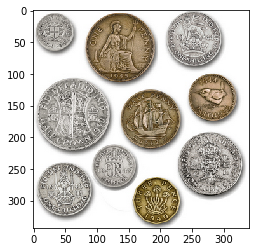

In [2]:
#Ячейка №2
import skimage 
import os 
from skimage import io 
filename = 'coins.png' #создание объекта 
image = io.imread(filename) 
plt.imshow(image) 
plt.show()

#### Шаг 3.  Обесцвечивание объекта-изображения.
Создайте объект "gray" с использованием функции cv2.cvtColor для преобразования цветного изображения в изображение с оттенками серого
<li>**cv2.cvtColor (src, code [, dst [, dstCn]]) → dst**</li>

    Параметры:

        src - входное изображение: 8-разрядное беззнаковое, 16-разрядное без знака (CV_16UC ...) или плавающая точка с одинарной точностью.
        dst - выходное изображение того же размера и глубины, что и src.
        code - код преобразования цветового пространства (см. описание ниже).
        dstCn - количество каналов в целевом изображении; если параметр равен 0, количество каналов автоматически выводится из src и кода.

Функция преобразует входное изображение из одного цветового пространства в другое. В случае преобразования в цветовое пространство RGB, порядок каналов должен быть указан явно (RGB или BGR). Обратите внимание, что формат цвета по умолчанию в OpenCV часто упоминается как RGB, но на самом деле это BGR (байты обращаются вспять). Таким образом, первый байт в стандартном (24-битном) цветном изображении будет 8-битным компонентом Blue, второй байт будет зеленым, а третий байт будет красным. Тогда четвертый, пятый и шестой байты будут вторым пикселем (синий, затем зеленый, затем красный) и т.д.

Значение code определяет способ преобразования RGB -> GREY (COLOR_BGR2GRAY, COLOR_RGB2GRAY, COLOR_GRAY2BGR, COLOR_GRAY2RGB) 
Отобразите созданный объект в экранном вьюере  с использованием функций ImageViewer и viewer.show библиотеки skimage 

In [4]:
#Ячейка №3
from skimage import data
from skimage.viewer import ImageViewer
filename = 'coins.png' #создание объекта 
gray = io.imread(filename) 
gray = cv2.cvtColor(gray, cv2.COLOR_BGR2GRAY)
cv2.imshow("CoinsGray", gray)
cv2.waitKey(0)


D:\Anaconda\lib\site-packages\skimage\viewer\utils\core.py:10: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  warn("Recommended matplotlib backend is `Agg` for full "


-1

#### Шаг 4.  Сравнение характеристик исходного и обесцвеченного объектов-изображений
Используя метод shape определите и сравните размерности объектов image и gray. Объясните чем вызвано изменение размерности
## Ответ-

In [5]:
#Ячейка №4
print(image.shape)
print(gray.shape) # изменилась размерность, так как был изменен код преобразования цветового пространаства

(343, 340, 3)
(343, 340)


#### Шаг 5.  Сглаживание объекта-изображения.
Используя метод GaussianBlur сформируйте объект blur_gray который представляет собой изображение gray обработанное указанным фильтром с ядром 3 х 3 и смещением 0
<li>**GaussianBlur(InputArray src, OutputArray dst, Size ksize, double sigmaX, double sigmaY=0, int borderType=BORDER_DEFAULT )**</li>

    Параметры:
    src — входное изображение; изображение может иметь любое количество каналов, которые обрабатываются независимо друг от друга, но глубина должна быть CV_8U, CV_16U, CV_16S, CV_32F или CV_64F.

    dst — выходное изображение того же размера и типа, что и src.

    ksize — размер Гауссова ядра. ksize.width и ksize.height могут отличаться, но они оба должны быть положительными и нечетным. 

    sigmaX — стандартное отклонение Гауссова ядра в направлении X.

    sigmaY — стандартное отклонение Гауссова ядра в Y направлении; если sigmaY равен нулю, то устанавливается равным sigmaX, если оба сигмы нули, они вычисляются из ksize.width и ksize.height, соответственно; для тогоб чтобы полностью контролировать результат, независимо от возможных будущих модификаций, рекомендуется указать все ksize, sigmaX и sigmaY.

    borderType — пиксельный метод экстраполяции.
Отобразите сглаженное изображение в экранном вьюере

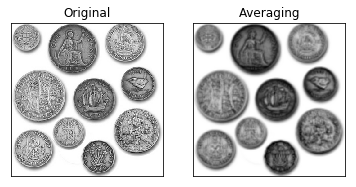

-1

In [10]:
#Ячейка №5
img = cv2.imread('coins.png', 0)

kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)

plt.subplot(121),plt.imshow(img, cmap = 'gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst, cmap = 'gray'),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()
cv2.waitKey(0)

#### Шаг 6.  Оконтуривание объекта-изображения.
Используя функцию Canny библиотеки cv2 сформируйте объект контурного изображения "edged" 
<li>**cv2.Canny (изображение, порог1, порог2 [, edge [, apertureSize [, L2gradient]]]) → контур**</li>

    Параметры:

        image - 8-битное входное изображение.
        edge - контурное изображение; одноканальное 8-битное изображение, которое имеет тот же размер, что и изображение.
        threshold1 - первый порог для процедуры гистерезиса.
        threshold2 - второй порог для процедуры гистерезиса.
        apertureSize - размер апертуры для оператора Sobel ().
        L2gradient - флаг, указывающий, следует ли использовать более точную норму 

Функция находит контур входного изображения, используя алгоритм Canny. Для формирования контурного изображения используются два пороговых значения: minVal и maxVal. Любой фрагмент контура с градиентом интенсивности больше, чем maxVal, становится частью контура, а те, у которых градиент интенсивности ниже minVal, гарантированно не будут принадлежать к контуру, поэтому будут отброшены. Те фрагменты контура, у которых градиент интенсивности  находится между этими двумя порогами, могут быть классифицированы или нет как фрагменты контура в  зависимости от их связности. Если они имеют связь с контуром, то считаются его частью. В противном случае они также будут отброшены. См. Изображение ниже:

<img src="hysteresis.jpg">

Контур A находится выше maxVal, поэтому считается действительным контуром. Хотя фрагмент контура C имеет интенсивность ниже maxVal, он связан с фрагментом A, поэтому он также считается действительным контуром, и мы получаем эту полную кривую. Но край B, хотя он выше minVal и находится в той же области, что и край C, он не связан ни с каким действительным контуром, и будет отброшен. Поэтому очень важно правильно выбрать minVal и maxVal, чтобы получить достоверный результат.

Этот этап также удаляет небольшие пиксельные шумы основываясь на предположении, что ребра являются длинными линиями.

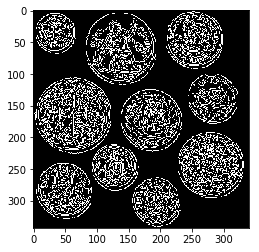

In [13]:
blur_gray = cv2.GaussianBlur(gray, (9, 9), cv2.BORDER_DEFAULT)
sigma = 0.5
median = np.median(blur_gray) 
lower = int(min(0, (1.0 - sigma) * median))
upper = int(max(255, (1.0 + sigma) * median))
edged = cv2.Canny(gray, lower, upper)
plt.imshow(edged, cmap='gray')

#### Шаг 7.  Нормализация контурного изображения.
Используя функцию getStructuringElement сформируйте вспомогательный структурирующий объект "kernel", который будет впоследствии использован для закрытия контуров.
<li>**cv2.getStructuringElement (shape, ksize [, anchor]) → retval**</li>

    Параметры:

        shape -Форма элемента
            MORPH_RECT - прямоугольный структурирующий элемент:
            MORPH_ELLIPSE - элемент эллиптического структурирования, то есть заполненный эллипс, вписанный в прямоугольник Rect (0, 0, esize.width, 0.esize.height)
            MORPH_CROSS - крестообразный структурирующий элемент
        ksize - Размер элемента структурирования.
        anchor - Якорная позиция внутри элемента. Значение по умолчанию (-1, -1) означает, что якорь находится в центре. Обратите внимание, что только форма крестообразного элемента зависит от положения якоря. В других случаях анкер просто регулирует, насколько изменяется результат морфологической операции.
        anchor_x - x-координата якоря
        anchor_y - y-координата якоря
     Используйте  (7,7) для определения якорной позиции  

С помощью функции morphologyEx сформируйте объект "closed" путем закрытия сформированных контуров на изображении "edged" с использованием структурирующего объекта "kernel"   
<li>**cv2.morphologyEx (src, op, kernel [, dst [, anchor [, iterations [, borderType [, borderValue]]]]]] → dst**</li>

        src - Исходное изображение. 
        dst - Изображение назначения того же размера и типа, что и src.
        Ядро - элемент структурирования. Его можно создать с помощью метода getStructuringElement ().
        anchor - Якорная позиция с ядром. Отрицательные значения означают, что якорь находится в центре ядра.
        
        op -Тип морфологической операции, которая может быть одной из следующих:
            MORPH_OPEN - операция открытия
            MORPH_CLOSE - операция закрытия
            MORPH_GRADIENT - морфологический градиент


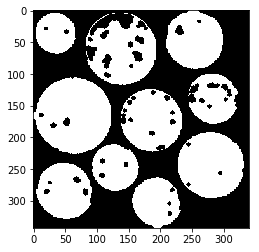

In [15]:
#Ячейка №7
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)
plt.imshow(closed, cmap='gray')

#### Шаг 8.  Поиск внешних контуров объекта-изображения.
Выполните поиск внешних контуров на объекте closed с использованием функции findContours и сформируйте объекты contours и hierarchy, которые содержат найденные контуры и их структуру, соответственно.

<li>**findContours( кадр, режим_группировки, метод_упаковки [, контуры[, иерархия[, сдвиг]]])**</li>

    кадр — должным образом подготовленная для анализа картинка. Это должно быть 8-битное изображение. Поиск контуров использует для работы монохромное изображение, так что все пиксели картинки с ненулевым цветом будут интерпретироваться как 1, а все нулевые останутся нулями. 

    режим_группировки — один из четырех режимов группировки найденных контуров:

    CV_RETR_LIST — выдаёт все контуры без группировки;
    CV_RETR_EXTERNAL — выдаёт только крайние внешние контуры. Например, если в кадре будет пончик, то функция вернет его внешнюю границу без дырки.
    CV_RETR_CCOMP — группирует контуры в двухуровневую иерархию. На верхнем уровне — внешние контуры объекта. На втором уровне — контуры отверстий, если таковые имеются. Все остальные контуры попадают на верхний уровень.
    CV_RETR_TREE — группирует контуры в многоуровневую иерархию.

    метод_упаковки — один из трёх методов упаковки контуров:

    CV_CHAIN_APPROX_NONE — упаковка отсутствует и все контуры хранятся в виде отрезков, состоящих из двух пикселей.
    CV_CHAIN_APPROX_SIMPLE — склеивает все горизонтальные, вертикальные и диагональные контуры.
    CV_CHAIN_APPROX_TC89_L1,CV_CHAIN_APPROX_TC89_KCOS — применяет к контурам метод упаковки (аппроксимации) Teh-Chin.

    контуры — список всех найденных контуров, представленных в виде векторов;

    иерархия — информация о топологии контуров. Каждый элемент иерархии представляет собой сборку из четырех индексов, которая соответствует контуру[i]:

    иерархия[i][0] — индекс следующего контура на текущем слое;
    иерархия[i][1] — индекс предыдущего контура на текущем слое:
    иерархия[i][2] — индекс первого контура на вложенном слое;
    иерархия[i][3] — индекс родительского контура.

    сдвиг — величина смещения точек контура.

In [16]:
#Ячейка №8
_, contours, hierarchy = cv2.findContours(closed,  cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

#### Шаг 9.  Отобразите найденные  контуры на объекте-изображении.
Выполните отрисовку внешних контуров на объекте image с использованием функции drawContours.
<li>**cv2.drawContours (image, contour, contourIdx, цвет [, толщина [, lineType [, hierarchy [, maxLevel [, offset]]]]]) → изображение**</li>

    Параметры:

        image - Изображение цели.
        contour - массив контуров. Каждый контур сохраняется в виде  вектора.
        contourIdx - Параметр, указывающий на отображаемый контур. Если он отрицательный, отображаются все контуры.
        цвет - цвет контуров.
        толщина - Толщина линий,которыми нарисованы контуры. 
        lineType - тип линии.(Используйте cv2.LINE_AA)
        hierarchy Дополнительная информация об иерархии. Это необходимо, только если вы хотите нарисовать только некоторые из контуров (см. MaxLevel).
        maxLevel - Максимальный уровень для контуров. Если он равен 0, нарисован только указанный контур. Если это 1, функция рисует контур (ы) и все вложенные контуры. Если это 2, функция рисует контуры, все вложенные контуры, все вложенные вложенные контуры и т. Д. Этот параметр учитывается только при наличии иерархии.
        offset - Дополнительный параметр смещения контура. 
 Отобразите полученный результат в экранном вьюере

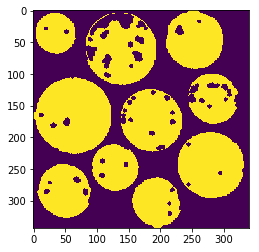

In [17]:
#Ячейка №9
cont = cv2.drawContours(closed, contours, 1, (0, 255, 0), 2)
plt.imshow(cont)

#### Шаг 10.  Напишите программу, которая отображает контур ТОЛЬКО ДЛЯ САМОЙ БОЛЬШОЙ ПО РАЗМЕРУ МОНЕТЫ объекта изображения image.

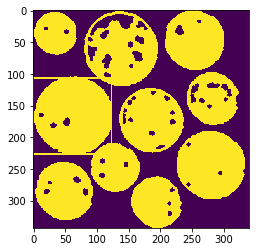

In [18]:
#Ячейка №10
cont = cv2.drawContours(closed, contours, 1, (255, 255, 255), 3)
if len(contours) != 0:
    cv2.drawContours(closed, contours, -1, 255, 3)

    c = max(contours, key = cv2.contourArea)

    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(closed,(x,y),(x+w,y+h),(255,255,255),2)
    plt.imshow(cont)